In [80]:
import numpy as np
class Matrix:
    def __init__(self, rows=None, columns=None, array="potato"):
        ## Array is defined by array[row][column]
        if array == "potato":
            self.columns = columns
            self.rows = rows
            self.array = np.array([[0 for c in range(columns)] for r in range(rows)])
        else:
            self.array = np.copy(array)
            self.rows = len(self.array)
            self.columns = len(self.array[0])
    def get_rows(self):
        return self.rows
    def get_columns(self):
        return seslf.columns
    def set_matrix(self, new_matrix):
        self.array = new_matrix
    def get_matrix(self):
        return self.array
    def set_value(self, row, column, value):
        self.array[row][column] = value
    def get_value(self, row, column):
        return self.array[row][column]
    def plus(self, another_matrix, operator):
        other_array = another_matrix.get_matrix()
        assert self.columns == another_matrix.columns and self.rows == another_matrix.rows
        result = [[0 for _ in range(another_matrix.columns)] for _ in range(self.rows)]
        for thisRow in range(len(result)):
            for thisColumn in range(len(result[0])):
                result[thisRow][thisColumn] = self.__helper_add(thisRow, thisColumn, other_array, operator)
        return Matrix(array=result)
    def __helper_add(self, row, column, other_array, operator):
        return operator.op1(self.array[row][column], other_array[row][column])
    # returns a new array
    def multiply(self, another_matrix, operator):
        other_array = another_matrix.get_matrix()
        assert self.columns == another_matrix.rows 
        result = [[0 for _ in range(another_matrix.columns)] for _ in range(self.rows)]
        for thisRow in range(len(result)):
            for thisColumn in range(len(result[0])):
                result[thisRow][thisColumn] = self.__helper_mult(thisRow, thisColumn, other_array, operator)
        return Matrix(array=result)
    
    def __helper_mult(self, row, column, other_array, operator):
        total = operator.OP1_ID
        for c in range(len(other_array)):
            other_value = other_array[c][column]
            this_value = self.array[row][c]
            total = operator.op1(total,operator.op2(this_value, other_value))
        return total
    def copy(self):
        new_array = [row[:] for row in self.array]
        return Matrix(array=new_array)
    # Operator is an AddMult or MinPlus
    def star(self, operator):
        if len(self.array) <= 1:
            return Matrix(array=[[operator.OP2_ID]])
        resultMatrix = self.copy()
        half = int(self.rows / 2) # We could also use columns, 
        # I am assuming a Square matrix
        a = Matrix(array=self.array[0:half,0:half])
        b = Matrix(array=self.array[0:half,half:])
        c = Matrix(array=self.array[half:,0:half])
        d = Matrix(array=self.array[half:,half:])
        dstar_Matrix = d.star(operator)
        f = a.plus(b.multiply(dstar_Matrix.multiply(c,operator),operator),operator)
        fstar_matrix = f.star(operator)
        new_b = fstar_matrix.multiply(b.multiply(dstar_Matrix,operator),operator)
        new_c = dstar_Matrix.multiply(c.multiply(fstar_matrix,operator),operator)
        new_d = dstar_Matrix.plus(dstar_Matrix.multiply(
            c.multiply(fstar_matrix.multiply(
                b.multiply(dstar_Matrix,operator),operator),operator),operator),operator)
        return flatten_four_2D_arrays(fstar_matrix.get_matrix(),
                                      new_b.get_matrix(),
                                      new_c.get_matrix(),
                                      new_d.get_matrix())
    
    def printSelf(self):
        print(np.matrix(self.array))
    
class AddMult:
    OP1_ID = 0
    OP2_ID = 1
    @staticmethod
    def op1(a, b):
        return a + b
    @staticmethod
    def op2(a, b):
        return a * b
class MinPlus:
    OP1_ID = float("inf")
    OP2_ID = 0
    @staticmethod
    def op1(a,b):
        return min(a,b)
    @staticmethod
    def op2(a,b):
        return a + b

# The arguments will be arrays
def flatten_four_2D_arrays(a,b,c,d):
    # len(a) == rows of a
    # len(a[0]) == columns of a
    return Matrix(array=np.concatenate([
    np.concatenate([a,b], axis=1),
    np.concatenate([c,d], axis=1)
]))
     
def printMatrix(array):
    print(np.matrix(array))

In [86]:
inf = float("inf")
array1 = [
    [0,1,9,5],
    [inf,0,inf,2],
    [inf,inf,0,inf],
    [inf,inf,inf,0]
]
array = np.array(array1)


In [87]:
half = int(len(array)/2)
print(half)
a = array[0:half,0:half]
b = array[0:half,half:]
c = array[half:,0:half]
d = array[half:,half:]

2


In [88]:
c

array([[ inf,  inf],
       [ inf,  inf]])

In [89]:
Matrix(array=array1).star(MinPlus()).printSelf()

[[  0.   1.   9.   3.]
 [ inf   0.  inf   2.]
 [ inf  inf   0.  inf]
 [ inf  inf  inf   0.]]


/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [93]:
import time

current_milli_time = lambda: int(round(time.time() * 1000))

In [97]:
start_time = current_milli_time()
array = np.random.rand(500,500)
Matrix(array=array).star(MinPlus()).printSelf()
print(current_milli_time() - start_time)

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


[[ 0.          0.01648487  0.00676841 ...,  0.01570087  0.00995638
   0.00956095]
 [ 0.00754154  0.          0.00962982 ...,  0.00634094  0.00415931
   0.00945124]
 [ 0.01550561  0.01726036  0.         ...,  0.01659339  0.0139306
   0.01194317]
 ..., 
 [ 0.01651635  0.01709752  0.01423409 ...,  0.          0.01454397
   0.0152936 ]
 [ 0.01063269  0.01004591  0.00798019 ...,  0.01100086  0.          0.00710675]
 [ 0.0085743   0.01199646  0.00990361 ...,  0.01193409  0.00627333  0.        ]]
168364


In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("./FilteredMatrix.csv")

In [107]:
real_thing_array = np.copy(np.array(df.values[0:500,0:500],dtype=float), )
inf = float("inf")

for x in range(len(real_thing_array)):
    for y in range(len(real_thing_array[0])):
        if x == y:
            real_thing_array[x][y] = inf
        elif real_thing_array[x][y] == 0:
            real_thing_array[x][y] = inf
real_thing = Matrix(array=real_thing_array)
result = real_thing.star(MinPlus())

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [108]:
result.printSelf()

[[ 0.  1.  1. ...,  3.  3.  3.]
 [ 1.  0.  1. ...,  3.  3.  3.]
 [ 1.  1.  0. ...,  4.  4.  4.]
 ..., 
 [ 1.  1.  1. ...,  0.  1.  4.]
 [ 1.  1.  1. ...,  4.  0.  4.]
 [ 1.  1.  1. ...,  4.  4.  0.]]


In [114]:
import math
twoDarr = result.get_matrix()
maximum = 0
best_row = -1
best_column = -1
for i in range(len(twoDarr)):
    for j in range(len(twoDarr[0])):
        if twoDarr[i][j] > maximum and not math.isinf(twoDarr[i][j]):
            maximum = twoDarr[i][j]
            best_row = i
            best_column = j
print(str(best_row) + "," + str(best_column))
print(twoDarr[best_row][best_column])

11,258
5.0


In [116]:
import pickle
index_to_link_dict = pickle.load(open("./index_to_link_dict.pickle", "rb"))

In [117]:
index_to_link_dict[11]

'https://www.hendrix.edu/CampusWeb'

In [118]:
index_to_link_dict[258]

'http://www.hendrix.edu/alumni/alumni.aspx?id=150'

In [119]:
real_thing_array = np.copy(np.array(df.values[0:500,0:500],dtype=float), )
inf = float("inf")

for x in range(len(real_thing_array)):
    for y in range(len(real_thing_array[0])):
        if x == y:
            real_thing_array[x][y] = inf
        elif real_thing_array[x][y] == 0:
            real_thing_array[x][y] = inf
real_thing = Matrix(array=real_thing_array)
result = real_thing.star(MinPlus())
import math
twoDarr = result.get_matrix()
maximum = 0
best_row = -1
best_column = -1
for i in range(len(twoDarr)):
    for j in range(len(twoDarr[0])):
        if twoDarr[i][j] > maximum and not math.isinf(twoDarr[i][j]):
            maximum = twoDarr[i][j]
            best_row = i
            best_column = j
print(str(best_row) + "," + str(best_column))
print(twoDarr[best_row][best_column])

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


11,258
5.0


In [120]:
index_to_link_dict[11]

'https://www.hendrix.edu/CampusWeb'

In [121]:
index_to_link_dict[258]

'http://www.hendrix.edu/alumni/alumni.aspx?id=150'

In [142]:
from scipy.misc import imsave
import matplotlib.pyplot as plt
freq = []
longest_path = twoDarr[best_row][best_column]
grey = [100,100,100]
# If the path is length 0, then we want white, if the path is length longest_path we want color
colorScheme = [256 - (x/(longest_path + 1)*100) for x in range(int(longest_path + 1))]
# colorScheme.reverse()
print(colorScheme)
arrayOfRGB = [[[] for c in range(len(twoDarr[0]))] for r in range(len(twoDarr))]
for x in range(len(twoDarr)):
    for y in range(len(twoDarr[0])):
        if math.isinf(twoDarr[x][y]):
            arrayOfRGB[x][y] = grey
        else:
            index = int(twoDarr[x][y])
            arrayOfRGB[x][y] = [colorScheme[index],colorScheme[index],colorScheme[index]]
            freq.append(index)
imsave("Paths.png",arrayOfRGB)
arrayOfRGB = None


[256.0, 239.33333333333334, 222.66666666666669, 206.0, 189.33333333333334, 172.66666666666666]


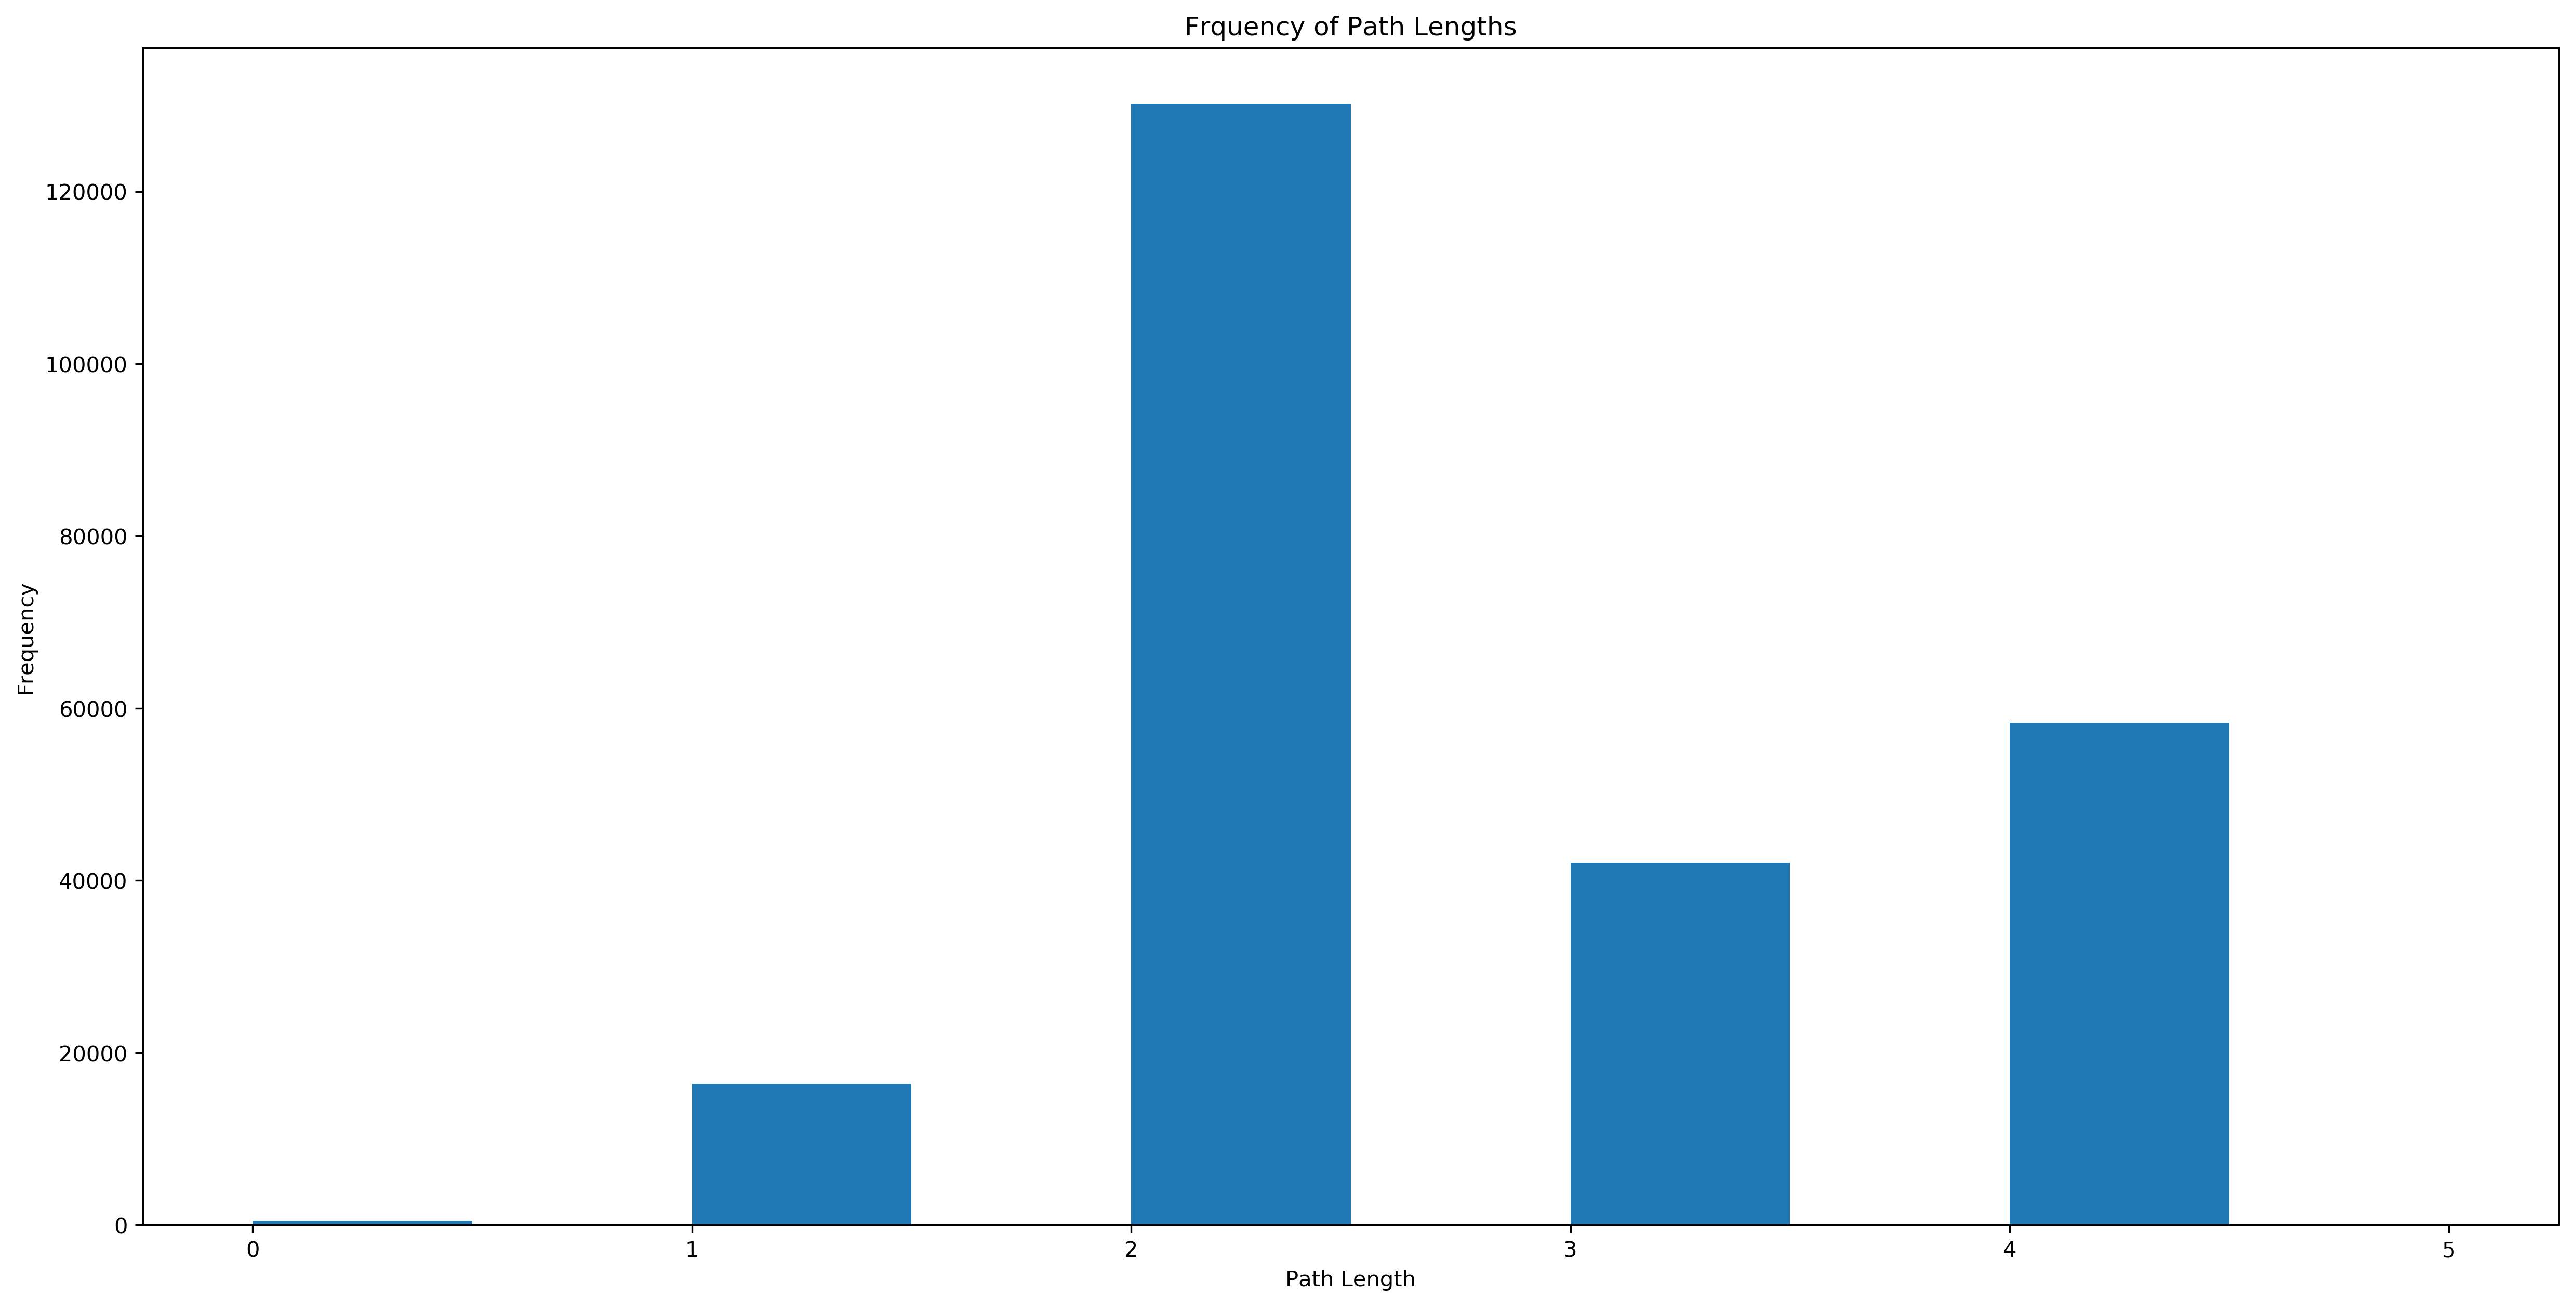

In [148]:
plt.figure(figsize=(20,10),dpi=300)
plt.hist(freq)
plt.title("Frquency of Path Lengths")
plt.ylabel("Frequency")
plt.xlabel("Path Length")
plt.savefig("histogram.png")
plt.show()